In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df =pd.read_csv('/content/drive/MyDrive/SCAAI_Drive_Swapnil Biswas_PS1/Binance Coin - Historic data.csv')
print(df)

              Date  Price(in dollars)    Open    High     Low     Vol.  Change%
0     Jul 27, 2021             303.29  304.31  307.62  298.53    2.26M    -0.33
1     Jul 26, 2021             304.31  302.60  327.62  301.19    2.86M     0.58
2     Jul 25, 2021             302.57  302.55  303.09  292.85    1.25M    -0.19
3     Jul 24, 2021             303.15  298.91  305.01  296.16    1.81M     1.42
4     Jul 23, 2021             298.89  293.51  301.15  281.68    1.98M     1.83
...            ...                ...     ...     ...     ...      ...      ...
1352  Nov 13, 2017               1.68    1.49    1.74    1.49  166.01K    12.75
1353  Nov 12, 2017               1.49    1.66    1.70    1.34  456.48K   -10.24
1354  Nov 11, 2017               1.66    1.71    1.93    1.58  256.71K    -2.92
1355  Nov 10, 2017               1.71    1.99    2.02    1.60  483.23K   -14.07
1356  Nov 09, 2017               1.99    1.99    2.20    1.90  283.35K     0.00

[1357 rows x 7 columns]


In [ ]:
#importing all the python libraries
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM , Activation


In [ ]:
#making a deep copy of the dataset
x = df.copy(deep=True)
print(x)

              Date  Price(in dollars)    Open    High     Low     Vol.  Change%
0     Jul 27, 2021             303.29  304.31  307.62  298.53    2.26M    -0.33
1     Jul 26, 2021             304.31  302.60  327.62  301.19    2.86M     0.58
2     Jul 25, 2021             302.57  302.55  303.09  292.85    1.25M    -0.19
3     Jul 24, 2021             303.15  298.91  305.01  296.16    1.81M     1.42
4     Jul 23, 2021             298.89  293.51  301.15  281.68    1.98M     1.83
...            ...                ...     ...     ...     ...      ...      ...
1352  Nov 13, 2017               1.68    1.49    1.74    1.49  166.01K    12.75
1353  Nov 12, 2017               1.49    1.66    1.70    1.34  456.48K   -10.24
1354  Nov 11, 2017               1.66    1.71    1.93    1.58  256.71K    -2.92
1355  Nov 10, 2017               1.71    1.99    2.02    1.60  483.23K   -14.07
1356  Nov 09, 2017               1.99    1.99    2.20    1.90  283.35K     0.00

[1357 rows x 7 columns]


In [ ]:
df.head

<bound method NDFrame.head of               Date  Price(in dollars)    Open    High     Low     Vol.  Change%
0     Jul 27, 2021             303.29  304.31  307.62  298.53    2.26M    -0.33
1     Jul 26, 2021             304.31  302.60  327.62  301.19    2.86M     0.58
2     Jul 25, 2021             302.57  302.55  303.09  292.85    1.25M    -0.19
3     Jul 24, 2021             303.15  298.91  305.01  296.16    1.81M     1.42
4     Jul 23, 2021             298.89  293.51  301.15  281.68    1.98M     1.83
...            ...                ...     ...     ...     ...      ...      ...
1352  Nov 13, 2017               1.68    1.49    1.74    1.49  166.01K    12.75
1353  Nov 12, 2017               1.49    1.66    1.70    1.34  456.48K   -10.24
1354  Nov 11, 2017               1.66    1.71    1.93    1.58  256.71K    -2.92
1355  Nov 10, 2017               1.71    1.99    2.02    1.60  483.23K   -14.07
1356  Nov 09, 2017               1.99    1.99    2.20    1.90  283.35K     0.00

[1357 row

In [ ]:
#getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1357 non-null   object 
 1   Price(in dollars)  1357 non-null   float64
 2   Open               1357 non-null   float64
 3   High               1357 non-null   float64
 4   Low                1357 non-null   float64
 5   Vol.               1357 non-null   object 
 6   Change%            1357 non-null   float64
dtypes: float64(5), object(2)
memory usage: 74.3+ KB


In [ ]:
#getting the number of rows and columns
df.shape

(1357, 7)

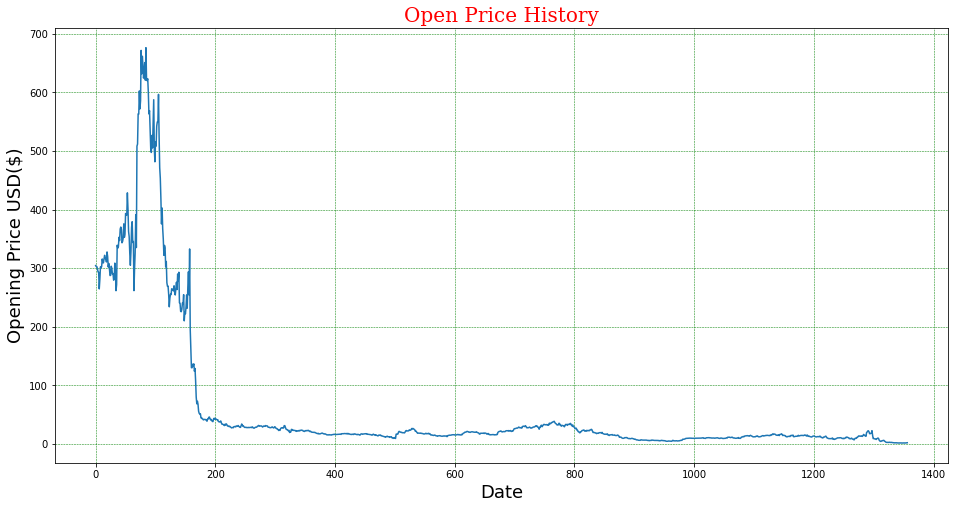

In [ ]:
#visualize the open price history
plt.figure(figsize = (16,8))

font1 = {'family':'serif','color':'red','size':20}

plt.title("Open Price History" , fontdict = font1)
plt.plot(df['Open'])
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Opening Price USD($)' , fontsize=18)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

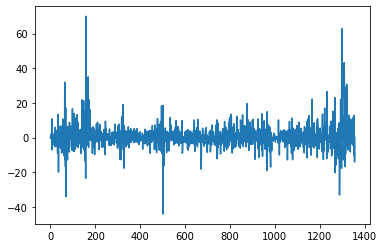

In [ ]:
data_change = df['Change%']
plt.plot(data_change, label = 'Changing Evolution')
plt.show()

In [ ]:
#create new dataframe with 'Open column'
data = df.filter(['Open'])

#converting the dataframe into numpy arrays
dataset = data.values

#Getting the number of rows to train the model
#taking 70 percent of the data(since we multiplied by 0.7) [training data set]
training_data_len = math.ceil(len(dataset)* .7)
training_data_len

950

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[4.48781789e-01],
       [4.46247555e-01],
       [4.46173454e-01],
       ...,
       [3.26041852e-04],
       [7.41004209e-04],
       [7.41004209e-04]])

In [ ]:
#creating training data set
#creating the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.44878179, 0.44624755, 0.44617345, 0.44077894, 0.4327761 ,
       0.43213883, 0.38991641, 0.41346553, 0.44559547, 0.44289822,
       0.44666252, 0.4655433 , 0.45645859, 0.45567313, 0.46632877,
       0.47486514, 0.46621021, 0.46724761, 0.45798506, 0.48337187,
       0.47204932, 0.44537317, 0.45407256, 0.44128283, 0.42367657,
       0.42407671, 0.44719604, 0.44221649, 0.42735195, 0.4288636 ,
       0.41193906, 0.41445847, 0.45509514, 0.43665896, 0.38529255,
       0.40061652, 0.50032604, 0.49300492, 0.49679886, 0.5204369 ,
       0.51225621, 0.54134803, 0.54625348, 0.53995495, 0.50650602,
       0.5099591 , 0.51865849, 0.55433043, 0.52025906, 0.52842492,
       0.58056198, 0.57590847, 0.57678286, 0.63278795, 0.59226984,
       0.53485684, 0.52187444, 0.48033375, 0.44952279, 0.485832  ])]
[0.5458237002786176]

[array([0.44878179, 0.44624755, 0.44617345, 0.44077894, 0.4327761 ,
       0.43213883, 0.38991641, 0.41346553, 0.44559547, 0.44289822,
       0.44666252, 0.4655433 , 0.456

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data since lsdm models expects input to be 3 dimensional
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1)) 
x_train.shape

(890, 60, 1)

In [ ]:
#Build the LSTM(Long Short Term Model) model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #adding a lstm layer
model.add(LSTM(units=50, return_sequences=True)) #adding another lstm layer
model.add(LSTM(units=50,  return_sequences=False)) #returning sequence as false because we dont want to create any more layers
model.add(Dense(units=25))  #making another layer having 25 neurons
model.add(Dense(units=1))   #prediction of the next closing value

In [ ]:
#compile the model
model.compile(optimizer= 'adam' , loss='mean_squared_error')

#train the model
model.fit(x_train , y_train , batch_size=2 , epochs=2)

Epoch 1/2
445/445 [==============================] - 24s 46ms/step - loss: 3.9442e-04
Epoch 2/2
445/445 [==============================] - 21s 47ms/step - loss: 3.4654e-04


In [ ]:
#create the training data set
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_tests and y_tests
x_test = []
y_test = dataset[training_data_len:, :] # we want our model to predict the values of y_test
for i in range(60, len(test_data)):  
    x_test.append(test_data[i-60:i, 0])
   

In [ ]:
#convert the data to a numpy aray
x_test = np.array(x_test)

In [ ]:
#reshape the data since we want 3-dimensional inputs
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1] , 1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # here we are unscaling the values

In [ ]:
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.0933326439541153

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


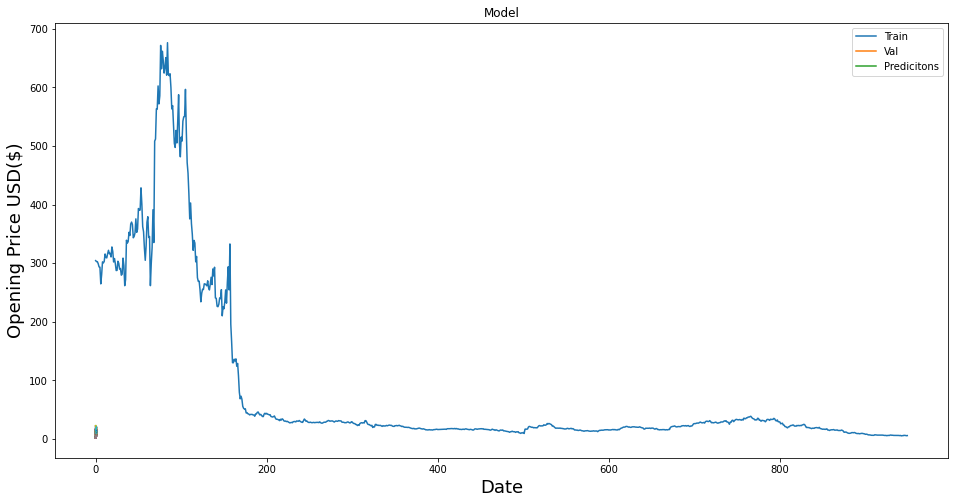

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Opening Price USD($)' , fontsize=18)
plt.plot(train['Open'])
plt.plot([valid["Open"],valid["Predictions"]])
plt.legend(['Train' , 'Val' , 'Predicitons'], loc='upper right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Open,Predictions
950,5.36,8.239012
951,5.54,7.910715
952,5.05,8.169835
953,4.62,7.704402
954,4.55,7.519466
...,...,...
1352,1.49,5.501567
1353,1.66,5.364160
1354,1.71,5.510063
1355,1.99,5.504855
